Task1_0731. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화하세요.

- from sklearn.decomposition import TruncatedSVD

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



<ipython-input-9-cac76a00a9bc>:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=100, marker='x', label='Test Data')


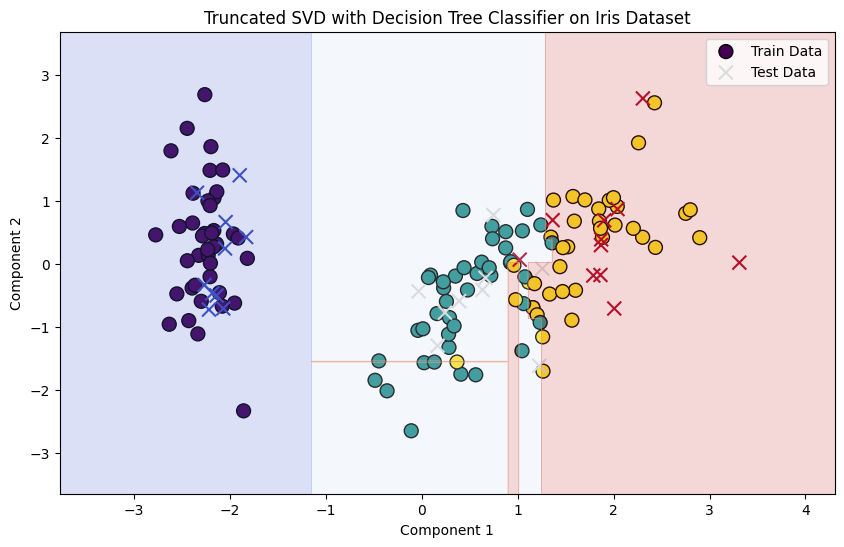

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Truncated SVD로 차원 축소
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_scaled)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 결정 트리 분류기 학습
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

# 시각화
plt.figure(figsize=(10, 6))

# Train 데이터 시각화
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=100, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=100, marker='x', label='Test Data')

# 경계 시각화
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Truncated SVD with Decision Tree Classifier on Iris Dataset')
plt.legend()
plt.show()


Task2_0731. Task1_0731 사례를 PCA로 적용한 시각화 결과와 비교하세요.

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



<ipython-input-11-81f96df6666a>:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=100, marker='x', label='Test Data')


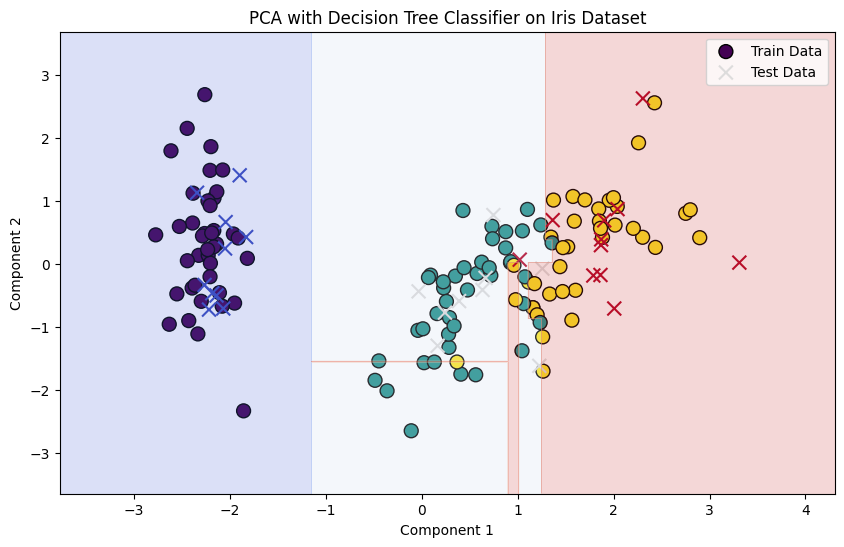

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA로 차원 축소
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 결정 트리 분류기 학습
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

# 시각화
plt.figure(figsize=(10, 6))

# Train 데이터 시각화
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=100, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=100, marker='x', label='Test Data')

# 경계 시각화
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA with Decision Tree Classifier on Iris Dataset')
plt.legend()
plt.show()


Task3_0731. 와인 품질 데이터셋을 사용하여 Truncated SVD를 통해 차원 축소를 수행하고, 로지스틱 회귀 모델을 학습 및 평가를 수행하세요.(다음 사항 참조)

- 특성 및 레이블 분리: 데이터셋에서 와인의 화학적 특성(X)과 품질 레이블(y)을 분리합니다.
- 레이블 변환: 와인 품질을 범주형 변수로 변환합니다. 구체적으로, 품질 점수가 3-5인 경우 'low', 6인 경우 'medium', 7-8인 경우 'high'로 변환합니다.
- 데이터 정규화: StandardScaler를 사용하여 데이터의 특성을 정규화합니다.
- 차원 축소: TruncatedSVD를 사용하여 데이터의 차원을 5로 축소합니다.
- 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
- 모델 학습: 로지스틱 회귀 모델을 학습합니다.
- 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력

In [1]:
import pandas as pd

# 1. 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# 특성(X) 및 레이블(y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 품질을 범주형 변수로 변환
def quality_to_category(quality):
    if quality >= 3 and quality <= 5:
        return 'low'
    elif quality == 6:
        return 'medium'
    elif quality >= 7 and quality <= 8:
        return 'high'

y = y.apply(quality_to_category)

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Truncated SVD를 사용하여 차원 축소
svd = TruncatedSVD(n_components=5, random_state=42)
X_reduced = svd.fit_transform(X_scaled)

# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs')
log_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = log_reg.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.58125
Classification Report:
              precision    recall  f1-score   support

        high       0.50      0.15      0.23        47
         low       0.63      0.84      0.72       141
      medium       0.52      0.45      0.48       132

    accuracy                           0.58       320
   macro avg       0.55      0.48      0.48       320
weighted avg       0.56      0.58      0.55       320



- 정확도가 너무 낮음..
==> 랜덤 포레스트 모델로 학습 모델 변경, 하이퍼 파라미터 튜닝,

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# 특성(X) 및 레이블(y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 품질을 범주형 변수로 변환
def quality_to_category(quality):
    if quality >= 3 and quality <= 5:
        return 'low'
    elif quality == 6:
        return 'medium'
    elif quality >= 7 and quality <= 8:
        return 'high'

y = y.apply(quality_to_category)

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Truncated SVD를 사용하여 차원 축소
svd = TruncatedSVD(n_components=5, random_state=42)
X_reduced = svd.fit_transform(X_scaled)

# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 및 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적 모델로 예측
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy: 0.721875
Classification Report:
              precision    recall  f1-score   support

        high       0.81      0.55      0.66        47
         low       0.74      0.83      0.78       141
      medium       0.68      0.67      0.67       132

    accuracy                           0.72       320
   macro avg       0.74      0.68      0.70       320
weighted avg       0.72      0.72      0.72       320

